<a href="https://colab.research.google.com/github/Victoredus/Ciencia-de-datos/blob/main/modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

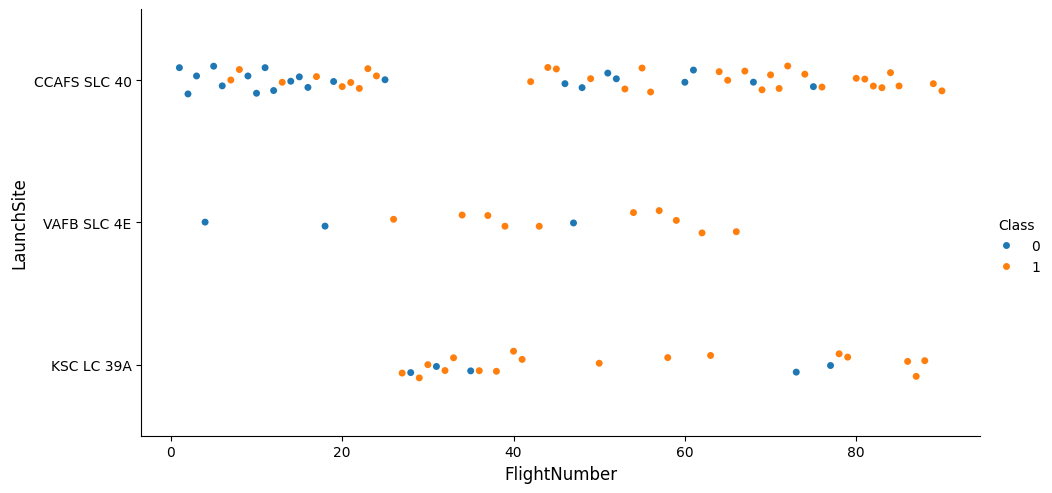

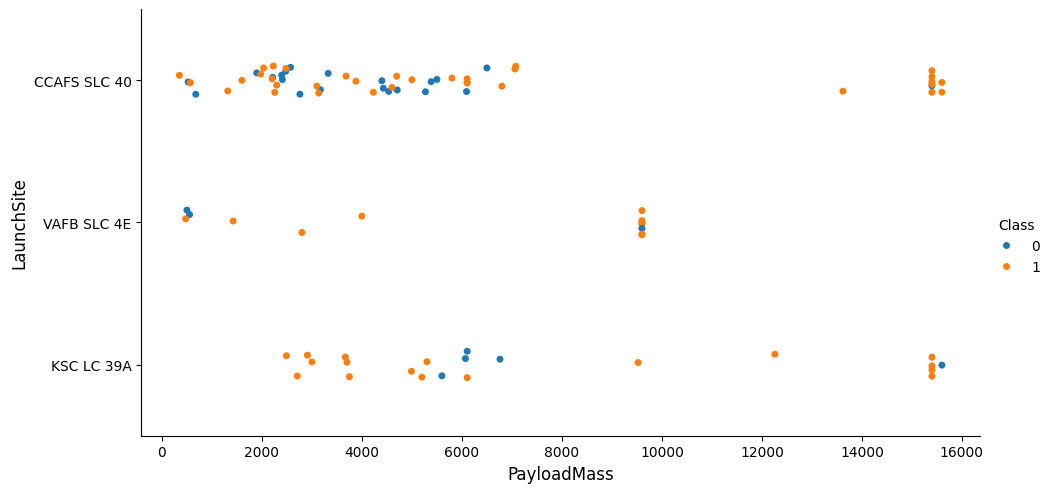

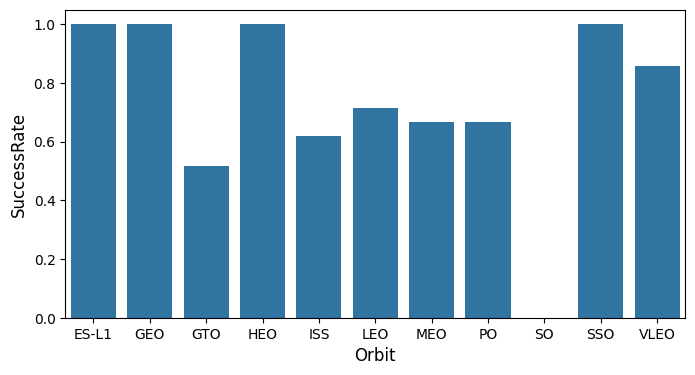

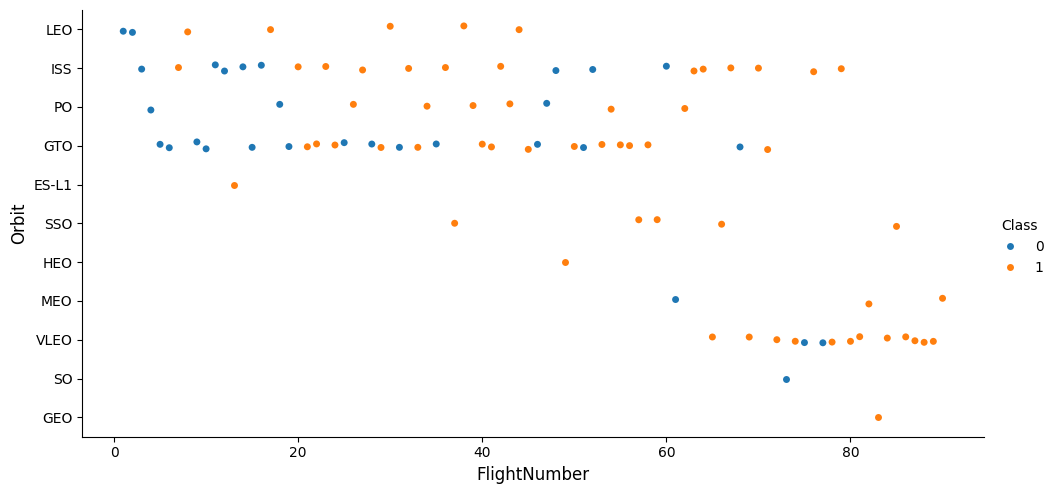

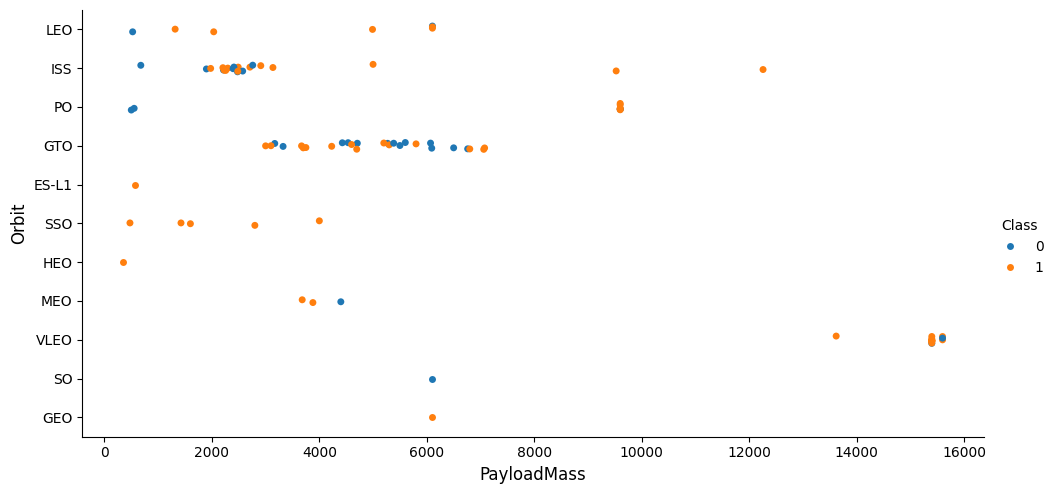

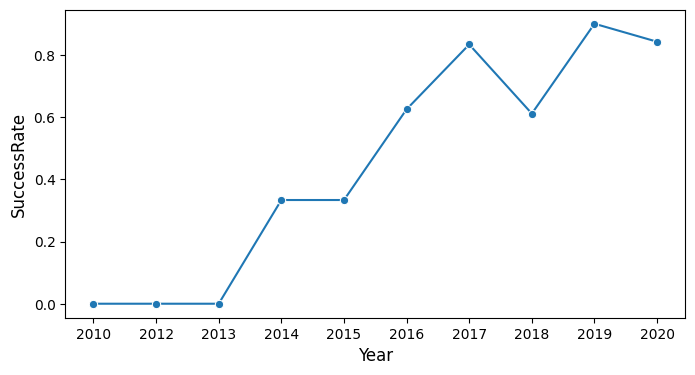

In [ ]:
!pip install numpy pandas seaborn matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(url)

# Tarea 1: Gráfico FlightNumber vs LaunchSite
sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class",data=df,aspect=2)
plt.xlabel("FlightNumber",fontsize=12)
plt.ylabel("LaunchSite",fontsize=12)
plt.show()

# Tarea 2: Gráfico PayloadMass vs LaunchSite
sns.catplot(y="LaunchSite",x="PayloadMass",hue="Class",data=df,aspect=2)
plt.xlabel("PayloadMass",fontsize=12)
plt.ylabel("LaunchSite",fontsize=12)
plt.show()

# Tarea 3: Éxito por tipo de órbita
orbita_exito=df.groupby('Orbit')['Class'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='Orbit',y='Class',data=orbita_exito)
plt.xlabel('Orbit',fontsize=12)
plt.ylabel('SuccessRate',fontsize=12)
plt.show()

# Tarea 4: FlightNumber vs Orbit
sns.catplot(y="Orbit",x="FlightNumber",hue="Class",data=df,aspect=2)
plt.xlabel("FlightNumber",fontsize=12)
plt.ylabel("Orbit",fontsize=12)
plt.show()

# Tarea 5: PayloadMass vs Orbit
sns.catplot(y="Orbit",x="PayloadMass",hue="Class",data=df,aspect=2)
plt.xlabel("PayloadMass",fontsize=12)
plt.ylabel("Orbit",fontsize=12)
plt.show()

# Tarea 6: Tendencia anual
df['Year']=df['Date'].str.split('-').str[0]
tendencia_anual=df.groupby('Year')['Class'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(x='Year',y='Class',data=tendencia_anual,marker='o')
plt.xlabel('Year',fontsize=12)
plt.ylabel('SuccessRate',fontsize=12)
plt.show()

# Ingeniería de características
features=df[['FlightNumber','PayloadMass','Orbit','LaunchSite','Flights','GridFins','Reused','Legs','LandingPad','Block','ReusedCount','Serial']]

# Tarea 7: Variables dummy
features_one_hot=pd.get_dummies(features,columns=['Orbit','LaunchSite','LandingPad','Serial'])

# Tarea 8: Convertir a float64
features_one_hot=features_one_hot.astype('float64')

# Exportar
features_one_hot.to_csv('dataset_part_3.csv',index=False)